In [1]:
import pandas as pd

In [2]:
data = (r'C:\Users\Arkhankhamar\Documents\metal_bands_2017.csv')

In [3]:
# Try different encodings until you find the correct one
possible_encodings = ['utf-8', 'latin1', 'iso-8859-1', 'utf-16']

for encoding in possible_encodings:
    try:
        df = pd.read_csv(data, sep=',', encoding=encoding)
        # If the reading succeeds without error, break the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding {encoding}. Trying another encoding...")

# Now df contains your DataFrame with the successfully read CSV data

Failed to read with encoding utf-8. Trying another encoding...


In [4]:
df

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)


In [6]:
df

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [7]:
df[df['style'].str.contains('area')]

,band_name,fans,formed,origin,split,style
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
29,Testament,1500,1983,USA,1983,Bay area thrash
52,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
79,Testament,1500,1983,USA,1983,Bay area thrash
120,Exodus,937,1980,USA,-,Bay area thrash
225,Death Angel,441,1982,USA,1982,Bay area thrash
450,Dark Angel,183,1981,USA,-,Bay area thrash
464,Forbidden,172,1985,USA,-,Bay area thrash
494,Heathen,160,1984,USA,-,Bay area thrash
1711,Lääz Rockit,25,1982,USA,1982,Bay area thrash


In [8]:
df_clean.soup = df_clean.soup.str.lower()

NameError: name 'df_clean' is not defined

In [8]:
df['band_name'].value_counts()

band_name
Iron Maiden          2
Kamelot              2
Helloween            2
Testament            2
Epica                2
                    ..
Alarum               1
Winter               1
Visceral Bleeding    1
Tremonti             1
Axis Of Despair      1
Name: count, Length: 4949, dtype: int64

In [9]:
df.isna().sum()

band_name    0
fans         0
formed       0
origin       8
split        0
style        0
dtype: int64

In [10]:
df.drop_duplicates().dropna()
df_clean = df.drop_duplicates().dropna()

In [13]:
df_clean

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4937,Atara,0,2006,France,2006,"Black,Grindcore"
4938,Avicularia,0,2003,Croatia,-,Avantgarde death
4939,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4940,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [12]:
df_clean.reset_index(drop=True, inplace=True)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


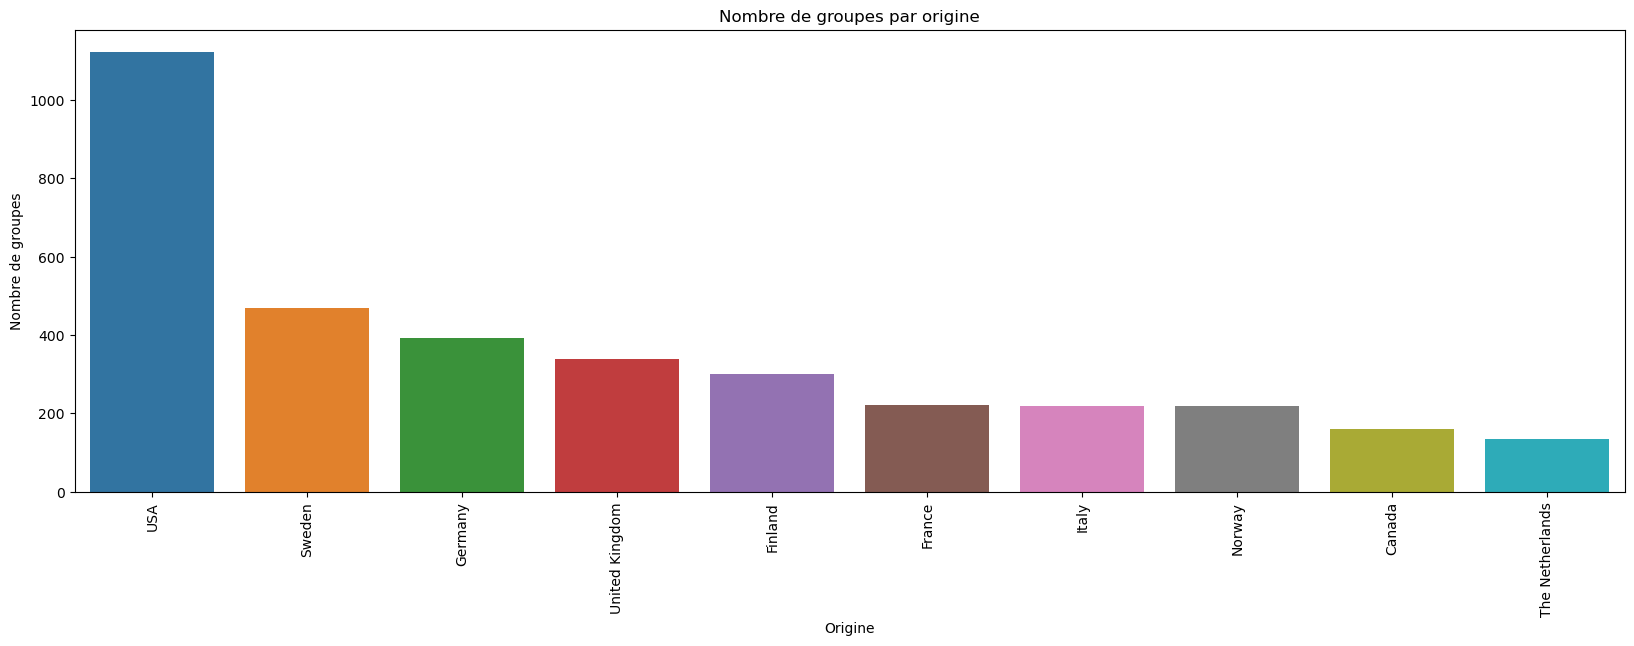

In [15]:
groupes_par_origine = df_clean.groupby('origin').size().reset_index(name='count')
# Trier par ordre décroissant du nombre de groupes
groupes_par_origine = groupes_par_origine.sort_values(by='count', ascending=False)

top_10_origines = groupes_par_origine.head(10)
plt.figure(figsize=(20, 6))
sns.barplot(data=top_10_origines, x='origin', y='count')
plt.xticks(rotation=90)
plt.title('Nombre de groupes par origine')
plt.xlabel('Origine')
plt.ylabel('Nombre de groupes')
plt.show()

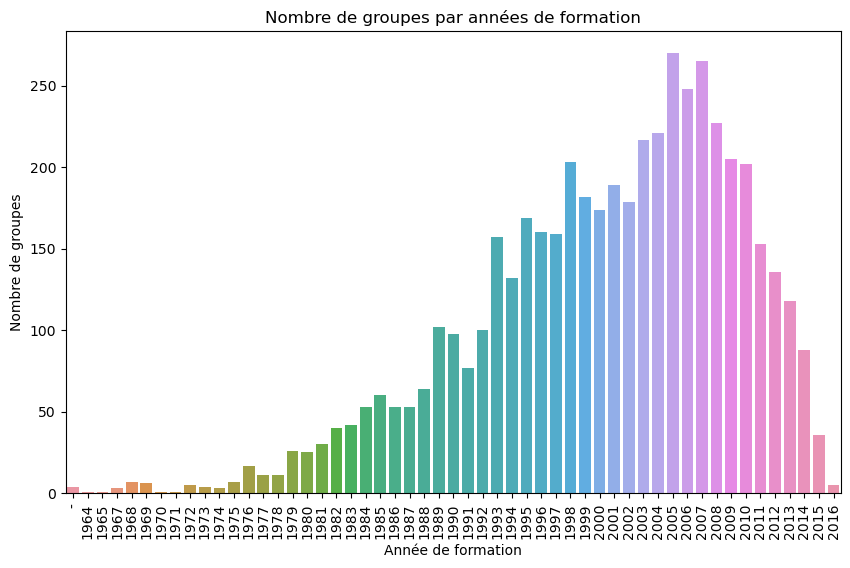

In [16]:
#tri des date de la colonne formed pour que ça apparraisse dans l'ordre sur X
tri_date = df_clean['formed'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='formed', order=tri_date.index)
plt.xticks(rotation=90)
plt.title('Nombre de groupes par années de formation')
plt.xlabel('Année de formation')
plt.ylabel('Nombre de groupes')
plt.show()

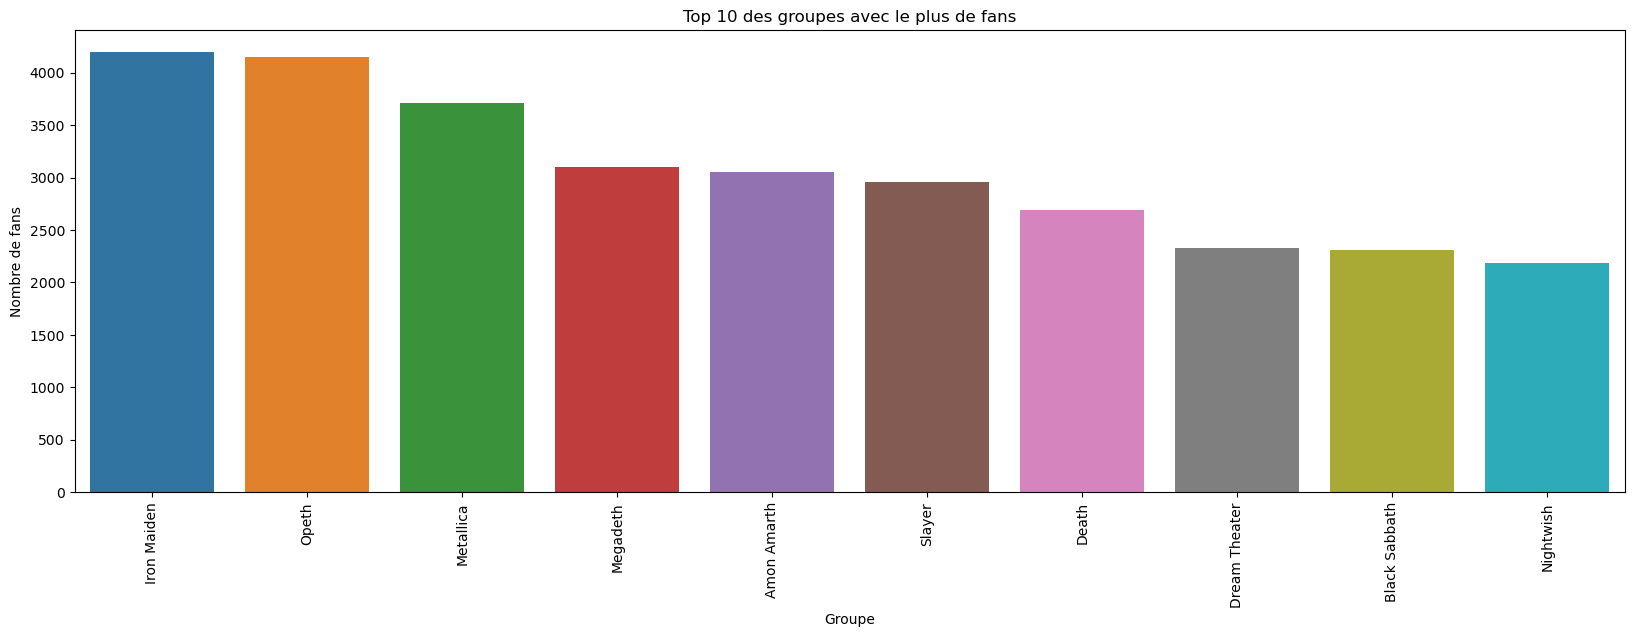

In [17]:
# Sélectionner les top 10 groupes avec le plus de fans
top_10_groupes = df_clean.sort_values(by='fans', ascending=False).head(10)

plt.figure(figsize=(20, 6))
sns.barplot(data=top_10_groupes, x='band_name', y='fans')
plt.xticks(rotation=90)
plt.title('Top 10 des groupes avec le plus de fans')
plt.xlabel('Groupe')
plt.ylabel('Nombre de fans')
plt.show()

In [18]:
df_clean

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4937,Atara,0,2006,France,2006,"Black,Grindcore"
4938,Avicularia,0,2003,Croatia,-,Avantgarde death
4939,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4940,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


In [19]:
df_clean['style'] = df_clean['style'].str.replace(',', ' ')

In [20]:
df_clean['style'] = df_clean['style'].str.replace('Bay area', 'Bayarea')

In [48]:
df_clean

,band_name,fans,formed,origin,split,style,soup
0,Iron Maiden,4195,1975,United Kingdom,-,New wave of british heavy Heavy,New wave of british heavy Heavy United Kingdom
1,Opeth,4147,1990,Sweden,1990,Extreme progressive Progressive rock Progressive,Extreme progressive Progressive rock Progressi...
2,Metallica,3712,1981,USA,-,Heavy Bayarea thrash,Heavy Bayarea thrash USA
3,Megadeth,3105,1983,USA,1983,Thrash Heavy Hard rock,Thrash Heavy Hard rock USA
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death Sweden
...,...,...,...,...,...,...,...
4937,Atara,0,2006,France,2006,Black Grindcore,Black Grindcore France
4938,Avicularia,0,2003,Croatia,-,Avantgarde death,Avantgarde death Croatia
4939,Awake,0,2006,United Kingdom,2006,Heavy Progressive,Heavy Progressive United Kingdom
4940,Axatak,0,1983,Australia,1988,Hard rock Heavy,Hard rock Heavy Australia


In [22]:
df_clean.loc[:, 'soup'] = df_clean[['style', 'origin']].apply(lambda x: ' '.join(x.dropna().astype(str)).replace(',', ''), axis=1)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

tf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = tf.fit_transform(df_clean['soup'])
tfidf_matrix.shape

#cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#df_clean = df_clean.reset_index()
band_name = df_clean['band_name']
indices = pd.Series(df_clean.index, index=df_clean['band_name'])

In [24]:
df_clean

,band_name,fans,formed,origin,split,style,soup
0,Iron Maiden,4195,1975,United Kingdom,-,New wave of british heavy Heavy,New wave of british heavy Heavy United Kingdom
1,Opeth,4147,1990,Sweden,1990,Extreme progressive Progressive rock Progressive,Extreme progressive Progressive rock Progressi...
2,Metallica,3712,1981,USA,-,Heavy Bayarea thrash,Heavy Bayarea thrash USA
3,Megadeth,3105,1983,USA,1983,Thrash Heavy Hard rock,Thrash Heavy Hard rock USA
4,Amon Amarth,3054,1988,Sweden,-,Melodic death,Melodic death Sweden
...,...,...,...,...,...,...,...
4937,Atara,0,2006,France,2006,Black Grindcore,Black Grindcore France
4938,Avicularia,0,2003,Croatia,-,Avantgarde death,Avantgarde death Croatia
4939,Awake,0,2006,United Kingdom,2006,Heavy Progressive,Heavy Progressive United Kingdom
4940,Axatak,0,1983,Australia,1988,Hard rock Heavy,Hard rock Heavy Australia


In [25]:
from sklearn.neighbors import NearestNeighbors

modelNN = NearestNeighbors(n_neighbors=20)
modelNN.fit(tfidf_matrix)
modelNN.kneighbors(tfidf_matrix)[1]

array([[ 480, 4117, 3809, ...,  191, 1709,  660],
       [   1, 3629,  698, ..., 1978, 4259,  352],
       [   2,   29, 1775, ...,   92,    5,  388],
       ...,
       [4939, 4253, 2076, ..., 4607, 1262, 2147],
       [4940, 2433, 4659, ..., 4153, 4340, 2301],
       [4370, 3831, 4807, ..., 2187, 2835, 3129]], dtype=int64)

In [47]:
dico_bands = {name : index for name,index in zip(list(df.band_name), list(df.index))}
dico_bands["Opeth"]

51

In [33]:
modelNN.kneighbors(tfidf_matrix[209])[1]

array([[ 305,  854,  140,  569,  209,  114, 2057, 4053,  559, 2860, 3604,
          67, 2002,  222,  792, 3382,  485,   27,  789, 1193]],
      dtype=int64)

In [37]:
df_clean.iloc[209]

band_name              Deftones
fans                        357
formed                     1988
origin                      USA
split                      1988
style            Nu Alternative
soup         Nu Alternative USA
Name: 209, dtype: object

In [29]:
df_clean[df_clean['band_name'].str.contains('Deftones')]

,band_name,fans,formed,origin,split,style,soup
209,Deftones,357,1988,USA,1988,Nu Alternative,Nu Alternative USA


In [39]:
from joblib import dump, load

In [40]:
dump(modelNN, 'model.joblib')

['model.joblib']

In [41]:
df_clean.to_csv('df_clean.csv', index=False)